In [1]:
import numpy as np
from osgeo import gdal, ogr,osr
import matplotlib.pyplot as plt
import glob,os,pathlib
import geopandas as gpd
from shapely.geometry import Polygon, mapping,LineString,Point

In [2]:
import clipping,masking,findindex

In [16]:
L2path = "C:/Users/Ananthu/Desktop/Landsat L2/Landsat C2 L2 Band Files"
clipped_path = "C:/Users/Ananthu/Desktop/Landsat L2/Clipped"
path_to_shape = "C:/Users/Ananthu/Desktop/Landsat L2/shp/test8.shp"

path_st_area = "C:/Users/Ananthu/Desktop/Landsat L2/Clipped"
index_out = "C:/Users/Ananthu/Desktop/Landsat L2/index"
mask_out = "C:/Users/Ananthu/Desktop/Landsat L2/masked"
path_to_mask = "C:/Users/Ananthu/Desktop/Landsat L2/contour/ndwi_mask/polygons_/20210207ndwicontour.shp"

In [13]:
List_img = glob.glob(L2path+'/*B*.tif')

Img_folders = glob.glob(path_st_area+'/L*')

index_list = glob.glob(index_out+'/L*')

In [14]:
index_list

['C:/Users/Ananthu/Desktop/Landsat L2/index\\LC08_L2SP_143052_20210207_20210302_02_T1',
 'C:/Users/Ananthu/Desktop/Landsat L2/index\\LC08_L2SP_143052_20210530_20210608_02_T1',
 'C:/Users/Ananthu/Desktop/Landsat L2/index\\LC08_L2SP_143052_20211224_20211230_02_T1',
 'C:/Users/Ananthu/Desktop/Landsat L2/index\\LC08_L2SP_143052_20220314_20220322_02_T1',
 'C:/Users/Ananthu/Desktop/Landsat L2/index\\LC08_L2SP_143052_20220415_20220420_02_T1',
 'C:/Users/Ananthu/Desktop/Landsat L2/index\\LC08_L2SP_144052_20210302_20210312_02_T1']

## Clip to the area of interest

In [6]:
for file in List_img:
    folderNm = pathlib.PurePath(file).name[:40]
    try:
        os.stat(clipped_path+'/'+folderNm)
    except:
        os.mkdir(clipped_path+'/'+folderNm)
    else:
        pass

    #clipping.Clip_to_bound(file,clipped_path,path_to_shape)

saved at : C:/Users/Ananthu/Desktop/Landsat L2/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B1.TIF
saved at : C:/Users/Ananthu/Desktop/Landsat L2/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B2.TIF
saved at : C:/Users/Ananthu/Desktop/Landsat L2/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B3.TIF
saved at : C:/Users/Ananthu/Desktop/Landsat L2/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B4.TIF
saved at : C:/Users/Ananthu/Desktop/Landsat L2/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B5.TIF
saved at : C:/Users/Ananthu/Desktop/Landsat L2/Clipped/LC08_L2SP_143052_20210207_20210302_02_T1/Clipped_LC08_L2SP_143052_20210207_20210302_02_T1_SR_B6.TIF
saved at : C:/Users/Ananthu/Desktop/Landsat L2/Clipped/LC08_L2SP_14305

## Get indices

In [6]:
for fl in Img_folders:
    
    folderNm = pathlib.PurePath(fl).name[:40]
    try:
        os.stat(index_out+'/'+folderNm)
    except:
        os.mkdir(index_out+'/'+folderNm)
    else:
        pass
    
    
    findindex.IndexCalculation(fl,index_out)

C:\Users\Ananthu\#Sensegrass\Final_codes\findindex.py:49: RuntimeWarning: invalid value encountered in true_divide
  wri = np.divide(B_3 + B_4, B_5+ B_7)


## Mask for water only

In [17]:
for file in index_list:
    folderNm = pathlib.PurePath(file).name[17:40]
    try:
        os.stat(mask_out+'/'+folderNm)
    except:
        os.mkdir(mask_out+'/'+folderNm)
    else:
        pass
    List_file = glob.glob(file+'/*.tif')
    List_file
    
    for f in List_file:
        #print(f)
        fileNm = pathlib.PurePath(f).name
        clipping.Clip_to_bound1(f,mask_out+'/'+folderNm+'/Msk_'+fileNm,path_to_mask)
        print(mask_out+'/'+folderNm+'/Msk_'+fileNm)

C:/Users/Ananthu/Desktop/Landsat L2/masked/20210207_20210302_02_T1/Msk_AWEILC08_L2SP_143052_20210207_20210302_02_T1.tif
C:/Users/Ananthu/Desktop/Landsat L2/masked/20210207_20210302_02_T1/Msk_MNDWILC08_L2SP_143052_20210207_20210302_02_T1.tif
C:/Users/Ananthu/Desktop/Landsat L2/masked/20210207_20210302_02_T1/Msk_NDMILC08_L2SP_143052_20210207_20210302_02_T1.tif
C:/Users/Ananthu/Desktop/Landsat L2/masked/20210207_20210302_02_T1/Msk_NDVILC08_L2SP_143052_20210207_20210302_02_T1.tif
C:/Users/Ananthu/Desktop/Landsat L2/masked/20210207_20210302_02_T1/Msk_NDWILC08_L2SP_143052_20210207_20210302_02_T1.tif
C:/Users/Ananthu/Desktop/Landsat L2/masked/20210207_20210302_02_T1/Msk_WRILC08_L2SP_143052_20210207_20210302_02_T1.tif
C:/Users/Ananthu/Desktop/Landsat L2/masked/20210530_20210608_02_T1/Msk_AWEILC08_L2SP_143052_20210530_20210608_02_T1.tif
C:/Users/Ananthu/Desktop/Landsat L2/masked/20210530_20210608_02_T1/Msk_MNDWILC08_L2SP_143052_20210530_20210608_02_T1.tif
C:/Users/Ananthu/Desktop/Landsat L2/mas

## Plotting

In [30]:
def sub_plots(raster_array,vmn,vmx,colr,Title,Ind):
    #vmn = -1
    #colr = 'seismic'
    #vmx = 1
    fig = plt.figure(figsize=(15,10))
    fig.suptitle(Title, fontsize=16)
    ax = plt.subplot(231)
    ax.set_title(" 2021 Feb  ")
    plt.imshow(raster_array[Ind],vmin=vmn,vmax = vmx, cmap=colr)
    plt.colorbar(fraction=0.03)
    
    ax = plt.subplot(232)
    ax.set_title("2021 march")
    plt.imshow(raster_array[Ind+6],vmin=vmn,vmax = vmx,cmap=colr)
    plt.colorbar(fraction=0.03)
    
    ax = plt.subplot(233)
    ax.set_title("2021 may ")
    plt.imshow(raster_array[Ind+12],vmin=vmn,vmax = vmx, cmap=colr)
    plt.colorbar(fraction=0.03)
    
    ax = plt.subplot(234)
    ax.set_title("2021 December")
    plt.imshow(raster_array[Ind+18],vmin=vmn,vmax = vmx, cmap=colr)
    plt.colorbar(fraction=0.03)
    
    ax = plt.subplot(235)
    ax.set_title("2022 march")
    plt.imshow(raster_array[Ind+24],vmin=vmn,vmax = vmx, cmap=colr)
    plt.colorbar(fraction=0.03)

    ax = plt.subplot(236)
    ax.set_title("2022 April")
    plt.imshow(raster_array[Ind+30], vmin=vmn,vmax = vmx, cmap=colr)
    plt.colorbar(fraction=0.03)



    plt.show()

In [23]:
List_file = glob.glob(mask_out+'/*'+'/*.tif')
List_file.sort()

In [28]:
#List_file #order= awei=0,mndwi=1, ndmi=2, ndvi=3, ndwi=4, wri=5

In [20]:
def ToRasterArray(band):
    Rast_Band=[]
    for b in band:
        W_im = gdal.Open(b)
        Rast_Band.append(W_im.GetRasterBand(1).ReadAsArray().astype(np.float32))
    return Rast_Band

In [22]:
Images = ToRasterArray(List_file)

In [25]:
len(Images)

36

In [ ]:
#for Ind give order no:. order= awei=0,mndwi=1, ndmi=2, ndvi=3, ndwi=4, wri=5

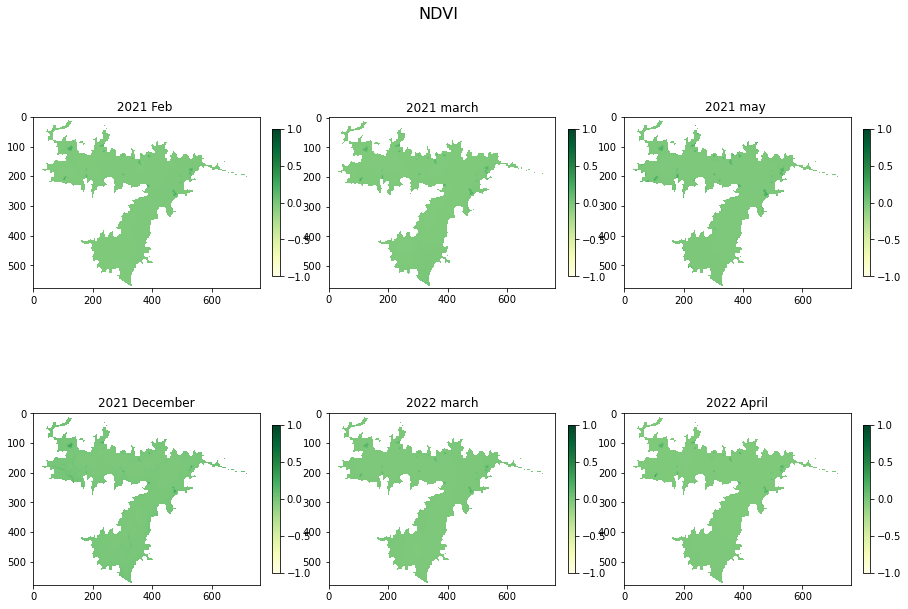

In [31]:
sub_plots(Images,vmn=-1,vmx=1,colr='YlGn',Title="NDVI",Ind=3)